In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('database/train.csv', index_col=0)
test_df = pd.read_csv('database/test.csv', index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Train Test Split

In [3]:
original_train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])


In [4]:
train_df, validation_df = train_test_split(original_train_df,test_size= 0.25, stratify=original_train_df['satisfaction'])

print('original_train_df: ',len(original_train_df))
print('train_df: ', len(train_df), "validation_df:", len(validation_df))
print('train_df: ', len(train_df)/len(original_train_df), "validation_df:", len(validation_df)/len(original_train_df))

original_train_df:  103904
train_df:  77928 validation_df: 25976
train_df:  0.75 validation_df: 0.25


# OverSampling

In [5]:
def overSampling(x, y):
  ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
  )
  return ros.fit_resample(x,y)

def printClassDistributionRate(y):
  print('total: ',len(y))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied']), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied']))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied'])/len(y), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied'])/len(y), '\n')

In [6]:
x_train_df = train_df.drop(columns='satisfaction')
y_train_df = train_df[['satisfaction']]

printClassDistributionRate(y_train_df)

x_train_df, y_train_df = overSampling(x_train_df, y_train_df )

printClassDistributionRate(y_train_df)

total:  77928
satisfied:  33769  not satisfied:  44159
satisfied:  0.43333589980494813  not satisfied:  0.5666641001950519 

total:  88318
satisfied:  44159  not satisfied:  44159
satisfied:  0.5  not satisfied:  0.5 



In [7]:
x_validation_df = validation_df.drop(columns='satisfaction')
y_validation_df = validation_df[['satisfaction']]

printClassDistributionRate(y_validation_df)

x_validation_df, y_validation_df = overSampling(x_validation_df, y_validation_df )

printClassDistributionRate(y_validation_df)

total:  25976
satisfied:  11256  not satisfied:  14720
satisfied:  0.43332306744687404  not satisfied:  0.566676932553126 

total:  29440
satisfied:  14720  not satisfied:  14720
satisfied:  0.5  not satisfied:  0.5 



# One Hot Enconding

In [17]:
encode_columns = ['Gender', 'Type of Travel']
x_validation_df = pd.get_dummies(x_validation_df, columns=encode_columns, drop_first=True)
x_train_df = pd.get_dummies(x_train_df, columns=encode_columns, drop_first=True)

# Missing Values

<Axes: >

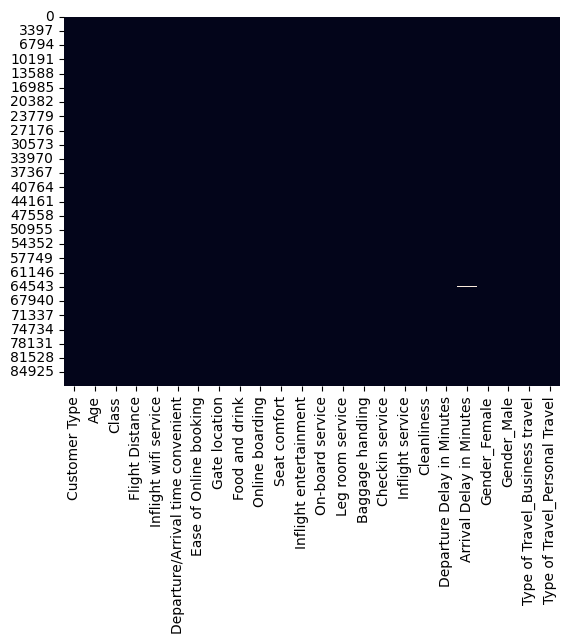

In [26]:
sns.heatmap(x_train_df.isnull(), cbar=False)